# Module Five Problem Set: Logistic Regression

In this notebook, you have been given a set of steps that will show you how to create a logistic regression model in R. It is very important to run the steps in order. Some steps depend on the outputs of earlier steps. Once you have run all the steps, you will be asked to create your own logistic regression model to help you answer the questions in the Module Five Problem Set. You are expected to write the R script yourself to answer these questions.

Reminder: If you have not already reviewed the Problem Set Report template for your Module Five Problem Set, be sure to do so now. That will give you an idea of the questions you will need to answer with the outputs of this script. You should use the code you are given as reference when writing your own scripts.

## Step 1: Loading the Data Set
You are a risk analyst working for a credit card company. You have access to a set of historical data that can be used to study the relationships between customer characteristics and whether or not they are likely to default on their credit. It is important for the company to calculate the risk that their customers will default on their credit. The table below shows some of the characteristics that will be used in the analysis below.

This block of R code will load the **credit_card_default.csv** data set. Here are the variables that will be retained:

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> age </div> | <div style="text-align: left"> Age of the individual </div> |
| <div style="text-align: left"> sex </div> | <div style="text-align: left"> Sex of the individual (1=male, 2=female) </div> |
| <div style="text-align: left"> education </div> | <div style="text-align: left"> Highest education level attained (1=high school, 2=college, 3=post graduate)</div> |
| <div style="text-align: left"> marriage </div> | <div style="text-align: left"> Is the individual married or unmarried? (1=unmarried, 2=married)</div> |
| <div style="text-align: left"> assets </div> | <div style="text-align: left"> Assets owned by the individual (0=none, 1=car only, 2=house only, 3=car and house) </div> |
| <div style="text-align: left"> missed_payment </div> | <div style="text-align: left"> Did the individual miss payments in the last 3 months? (0=none, 1=missed) </div> |
| <div style="text-align: left"> credit_utilize </div> | <div style="text-align: left"> Credit utilization by the individual, meaning how much of the credit allowed is being used </div> |
| <div style="text-align: left"> default </div> | <div style="text-align: left"> Did the individual default on their credit? (0 = did not default, 1 = default) </div> |
Note: Credit utilization is expressed as a decimal representing the percentage of your total credit limit you have utilized. For example, if you have used 50% of your credit limit, the value of credit_utilize would be 0.50.
<br><br>
Reference: 
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. <i>Expert Systems with Applications</i>, 36(2), 2473-2480. Retrieved from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.

Click the code section below and hit the **Run** button above.
<br><br>
<font color='red'>**Note:** The code section below will first install two R packages: "ResourceSelection" and "pROC". Please do not move to the next step until the packages are fully installed. This will take some time. Once the installation is complete, this step will print first 6 rows of the data set.</font>

In [2]:
print("The code section below will first install two R packages: ResourceSelection and pROC.") 
print("Please do not move to the next step until the packages are fully installed.") 
print("This will take some time.") 
print("Once the installation is complete, this step will print first 6 rows of the data set.")


# Loading R packages that are needed for some calculations below
install.packages("ResourceSelection")
install.packages("pROC")

# Loading credit card default data set
credit_default <- read.csv(file='credit_card_default.csv', header=TRUE, sep=",")

# Converting appropriate variables to factors  
credit_default <- within(credit_default, {
   default <- factor(default)
   sex <- factor(sex)
   education <- factor(education)
   marriage <- factor(marriage)
   assets <- factor(assets)
   missed_payment <- factor(missed_payment)
})

print("installation completed!")
print("data set (first 6 observations)")
head(credit_default, 6)

[1] "The code section below will first install two R packages: ResourceSelection and pROC."
[1] "Please do not move to the next step until the packages are fully installed."
[1] "This will take some time."
[1] "Once the installation is complete, this step will print first 6 rows of the data set."


Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)
Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)


[1] "installation completed!"
[1] "data set (first 6 observations)"


age,sex,education,marriage,assets,missed_payment,credit_utilize,default
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
28,2,2,2,0,1,0.174,0
25,1,1,1,1,1,1.000,1
49,2,1,1,0,1,0.540,1
26,2,2,2,3,0,0.347,0
38,1,1,2,2,1,0.312,0
33,2,1,1,0,1,1.000,1


## Step 2: Creating Logistic Regression Model
In this step, you will create a logistic regression model for defaulting on credit as the response variable and education and credit utilization as predictor variables. Education is a qualitative variable and credit utilization is a quantitative variable. A higher level of education is expected to be correlated with higher salary and therefore a lower risk of defaulting. A larger credit utilization is a red flag for financial institutions. Therefore, it is expected that the chance of defaulting is higher if credit utilization is higher. 

Note that education has three levels in the data set; 1=high school, 2=college, 3=post graduate. This can be represented by two dummy variables. 

The general form of this regression model is:
<br><br>

\begin{equation*}
\Large E(y) = \frac{e^{({\beta}_0\ +\ {\beta}_1 {x}_1\ +\ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3)}}{1+e^{({\beta}_0\ +\ {\beta}_1 {x}_1\ + \ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3)}}
\end{equation*}
<br><br>


\begin{equation*}
\text{where y is 1 for defaulting on credit and 0 for not defaulting on credit,}\ {x}_1\ \text{is credit utilization,}
\end{equation*}
<br>

\begin{equation*}
\text{and}\ \ {x}_2\ \text{and}\ {x}_3\ \text{are dummy variables for education}
\end{equation*}
<br><br>

This can be transformed to form a model that is linear in the beta terms:
<br><br>

\begin{equation*}
\large ln(\frac{\pi}{1 - \pi }) = {\beta}_0\ +\ {\beta}_1 {x}_1\ + \ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3
\end{equation*}
<br><br>

The left side of the equation above is the natural log of odds, so this can be written as:
<br><br>

\begin{equation*}
\large ln(\ odds\ ) = {\beta}_0\ +\ {\beta}_1 {x}_1\ + \ {\beta}_2 {x}_2\ + \ {\beta}_3 {x}_3
\end{equation*}
<br><br>


The prediction regression equation is:
<br>

\begin{equation*}
\large ln(\ odds\ ) = \hat{{\beta}_0}\ +\ \hat{{\beta}_1} {x}_1\ +\ \hat{{\beta}_2} {x}_2\ +\ \hat{{\beta}_3} {x}_3
\end{equation*}
<br><br>


\begin{equation*}
\text{where odds is the odds of defaulting (default=1)}
\end{equation*}

\begin{equation*}
\hat{{\beta}_0} \text{,} \hspace{0.25cm} \hat{{\beta}_1} \text{, } \hspace{0.25cm} \hat{{\beta}_2} \text{, } \hspace{0.25cm} \hat{{\beta}_3} \text{  } \text{ are estimates of }
\text{  } {\beta}_0\ \text{,} \hspace{0.25cm} {\beta}_1\ \text{,} \hspace{0.25cm} {\beta}_2\ \text{,} \hspace{0.25cm} {\beta}_3\ \text{ respectively  }
\end{equation*}
<br><br>

The code below will create the logistic regression model and print statistics for the Wald's test. Recall that the Wald's test is for the individual slope (beta) parameters. Click the block of code below and hit the **Run** button above.  

In [3]:
# Create the complete model
logit <- glm(default ~ credit_utilize + education , data = credit_default, family = "binomial")

summary(logit)


Call:
glm(formula = default ~ credit_utilize + education, family = "binomial", 
    data = credit_default)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48812  -0.12355   0.00000   0.04386   2.24777  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -8.8488     1.1849  -7.468 8.13e-14 ***
credit_utilize  34.3869     4.0326   8.527  < 2e-16 ***
education2      -1.4975     0.4668  -3.208  0.00134 ** 
education3      -4.2540     0.5963  -7.134 9.72e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 827.93  on 599  degrees of freedom
Residual deviance: 179.33  on 596  degrees of freedom
AIC: 187.33

Number of Fisher Scoring iterations: 9


 ### Interpretation of Beta Estimates

Based on the output in previous step, the regression model is:
<br><br>

\begin{equation*}
\large \hat{y} = \frac{e^{(-8.8488\ +\ 34.3869 {x}_1\ -\ 1.4975 {x}_2\ -\ 4.2540 {x}_3)}}{1+e^{(-8.8488\ +\ 34.3869 {x}_1\ -\ 1.4975 {x}_2\ -\ 4.2540 {x}_3)}}
\end{equation*}
<br><br>

The linear form of this can be written as:
<br><br>
\begin{equation*}
\large ln(\ odds\ ) = -8.8488\ +\ 34.3869 {x}_1\ -\ 1.4975 {x}_2\ -\ 4.2540 {x}_3
\end{equation*}
<br><br>

**Interpret the estimated coefficient of credit utilization. **

* The estimated coefficient for variable credit utilization is 34.3869. This means that on average, the change in log odds for defaulting is 0.343869 for each percentage increase in credit utilization, holding all other variables constant. Note that the figure 0.343869 is obtained by dividing 34.3869 by 100 because credit utilization is expressed as a percentage.
<br><br>

* An alternative way to express this is in terms of odds (and not log odds). If we calculate:
 <br><br>
 
 \begin{equation*}
 \large e^{(0.343869)}-1 = 0.4104
 \end{equation*}
 <br><br>
 
 The odds of defaulting increase by 41.04% for each percentage increase in credit utilization, holding all other variables constant. Again, the figure 0.343869 is obtained by dividing 34.3869 by 100 because credit utilization is expressed as a percentage. The figure 41.04% is obtained by multiplying the decimal value (0.4104) by 100, to turn the decimal into a percentage.
<br><br>

* Note that the sign for 0.4104 is positive. If this were -0.4104, then the odds of defaulting would *decrease* by 41.04% for each percentage increase in credit utilization, holding all other variables constant.

## Step 3: Wald Confidence Intervals for Slope Parameters
This step will print the Wald-based 95% confidence intervals for the slope parameters. 

In [4]:
conf_int <- confint.default(logit, level=0.95)
round(conf_int,4)

,2.5 %,97.5 %
(Intercept),-11.1711,-6.5265
credit_utilize,26.4832,42.2906
education2,-2.4125,-0.5826
education3,-5.4227,-3.0854


## Step 4: Hosmer-Lemeshow Goodness of Fit (GOF) Test
This block of R code will run the Hosmer-Lemeshow goodness of fit test to assess whether the model is appropriate for the data set. It evaluates if the predictions for credit default are close to the observed values. The output of the test is the chi-square test statistic and the associated P-value. Recall that the null hypothesis is that the model fits the data and the alternative hypothesis is that the model does not fit the data.

Click the code section below and hit the **Run** button above.

In [5]:
library(ResourceSelection)


print("Hosmer-Lemeshow Goodness of Fit Test")
hl = hoslem.test(logit$y, fitted(logit), g=50)
hl

ResourceSelection 0.3-6 	 2023-06-27


[1] "Hosmer-Lemeshow Goodness of Fit Test"


Warning message in hoslem.test(logit$y, fitted(logit), g = 50):
"The data did not allow for the requested number of bins."


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  logit$y, fitted(logit)
X-squared = 31.582, df = 47, p-value = 0.9588


## Step 5: Confusion Matrix
This block of R code will obtain the confusion matrix using the model that is created and calculate the accuracy, precision, and recall. The confusion matrix, also known as an error matrix, allows us to evaluate the performance of the logistic regression model. The rows of the table represent the predicted outcomes, while the columns represent the actual outcomes. The table output is of the form:


|              | **Prediction = 0**        | **Prediction = 1**        |
|--------------|-----------------|-----------------|
| **Actual = 0** | True Negatives  | False Positives |
| **Actual = 1** | False Negatives | True Positives  |

- True Positive (TP): The actual value is 1 (default=1) and the predicted value is 1 (default=1), hence a true positive. 
- True Negative (TN): The actual value is 0 (default=0) and the predicted value is 0 (default=0), hence a true negative. 
- False Positive (FP): The actual value is 0 (default=0) and the predicted value is 1 (default=1), hence a false positive. This is also the Type 1 Error.
- False Negative (FN): The actual value is 1 (default=1) and the predicted value is 0 (default=0), hence a false negative. This is also the Type 2 Error.

<br><br>

**Accuracy** is the ratio of the number of correct predictions to the total number of observations.
<br><br>
\begin{equation*}
Accuracy = \frac{TP\ +\ TN}{TP\ +\ TN\ +\ FP\ + FN} 
\end{equation*}

<br><br>

**Precision** is the ratio of correct positive predictions to the total predicted positives.
<br><br>
\begin{equation*}
Precision = \frac{TP}{TP\ +\ FP} 
\end{equation*}

<br><br>

**Recall** is the ratio of correct positive predictions to the total positives examples.

\begin{equation*}
Recall = \frac{TP}{TP\ +\ FN} 
\end{equation*}

<br><br>

Click the code section below and hit the **Run** button above.

In [6]:
# Predict default or no_default for the data set using the model
default_model_data <- credit_default[c('education', 'credit_utilize')]
pred <- predict(logit, newdata=default_model_data, type='response')

# If the predicted probability of default is >=0.50 then predict credit default (default='1'), otherwise predict no credit 
# default (default='0') 
depvar_pred = as.factor(ifelse(pred >= 0.5, '1', '0'))

# This creates the confusion matrix
conf.matrix <- table(credit_default$default, depvar_pred)[c('0','1'),c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": default=")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": default=")

# Print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction: default=0,Prediction: default=1
Actual: default=0,254,22
Actual: default=1,21,303


 ## Step 6: Receiver Operating Characteristic (ROC) Curve
This code will plot the ROC curve. The ROC curve measures the performance for a classifier (such as a logistic regression model) at various threshold settings. The area under the curve is an indicator of how well the model distinguishes between y=0 (no default on credit) and y=1 (default on credit). In general, a larger area under the curve is desired as it represents a model that is better at predicting the classes (0 or 1). For this data set, this means that a larger area under the curve represents a model that is better at predicting defaulting or not defaulting on credit. 

Click the code section below and hit the **Run** button above.

NOTE: If the plot is not created, click the code section and hit the **Run** button again.

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "Area Under the Curve (AUC)"


[1] 0.9859

[1] "ROC Curve"


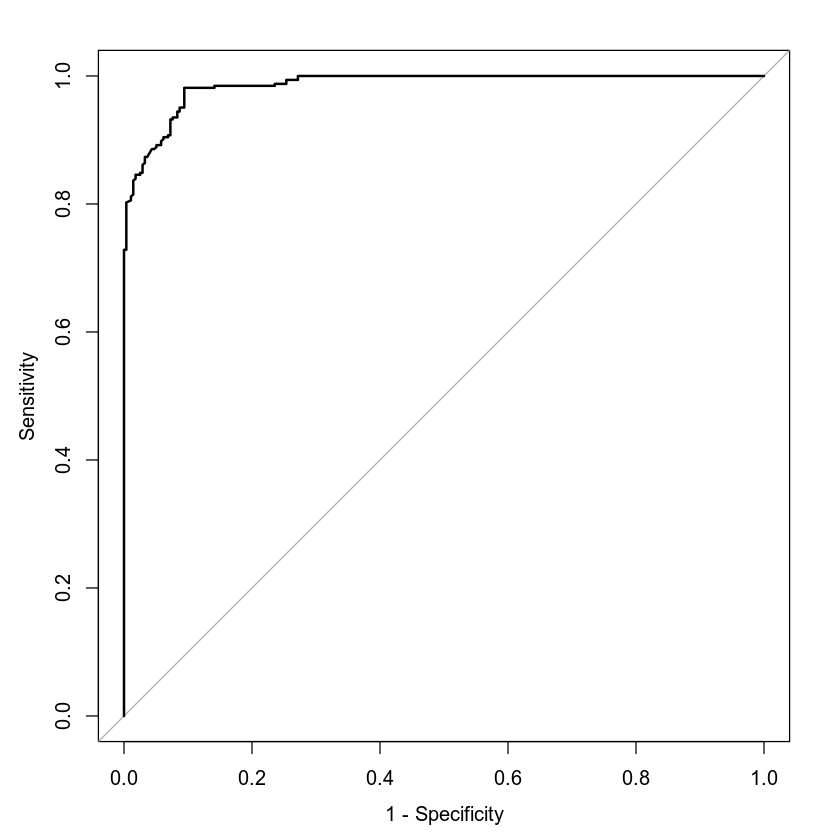

In [7]:
library(pROC)

labels <- credit_default$default
predictions <- logit$fitted.values

roc <- roc(labels ~ predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")
# True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity)
plot(roc, legacy.axes = TRUE)

## Step 7: Prediction
Recall that a logistic regression model predicts the probability of y=1. In this example, it predicts the probability of defaulting on credit (default=1). The code section below predicts the probability of defaulting for an individual who is a high school graduate and has 40% credit utilization and another individual who is a postgraduate and has 35% credit utilization.  

Click the block of code below and hit the **Run** button above.  

In [8]:
print("Prediction: education is high school (education='1'), credit utilization is 40% (credit_utilize=0.40)")
newdata1 <- data.frame(education="1", credit_utilize=0.40)
pred1 <- predict(logit, newdata1, type='response')
round(pred1, 4)

print("Prediction: education is postgraduate (education='3'), credit utilization is 35% (credit_utilize=0.35)")
newdata2 <- data.frame(education="3", credit_utilize=0.35)
pred2 <- predict(logit, newdata2, type='response')
round(pred2, 4)

[1] "Prediction: education is high school (education='1'), credit utilization is 40% (credit_utilize=0.40)"


1 
0.9927

[1] "Prediction: education is postgraduate (education='3'), credit utilization is 35% (credit_utilize=0.35)"


1 
0.2559

## Your Code

You have been asked to create logistic regression models in the Module Five Problem Set. Review the Problem Set Report template to see the questions you will be answering about your models.

Use the empty blocks below to write the R code for your model and get outputs. Then use the outputs to answer the questions in your problem set report.

**Note: Use the + (plus) button to add new code blocks or the scissor icon to remove empty code blocks, if needed.**

In [9]:
# Logistic regression model for defaulting on credit as response variable
#and credit utilization, assets, and missed payment(s) as predictors.

In [10]:
# Loading credit card default data set
credit_default <- read.csv(file='credit_card_default.csv', header=TRUE, sep=",")

# Converting appropriate variables to factors  
credit_default <- within(credit_default, {
   default <- factor(default)
   sex <- factor(sex)
   education <- factor(education)
   marriage <- factor(marriage)
   assets <- factor(assets)
   missed_payment <- factor(missed_payment)
})

head(credit_default, 6)

# Get number of rows and columns in dataset
cat("Number of rows: ", nrow(credit_default))
cat("\nNumber of columns: ", ncol(credit_default))

age,sex,education,marriage,assets,missed_payment,credit_utilize,default
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
28,2,2,2,0,1,0.174,0
25,1,1,1,1,1,1.000,1
49,2,1,1,0,1,0.540,1
26,2,2,2,3,0,0.347,0
38,1,1,2,2,1,0.312,0
33,2,1,1,0,1,1.000,1


Number of rows:  600
Number of columns:  8

In [11]:
#Generate regression model
logit <- glm(default ~ credit_utilize + assets + missed_payment, data = credit_default, family = "binomial")

summary(logit)


Call:
glm(formula = default ~ credit_utilize + assets + missed_payment, 
    family = "binomial", data = credit_default)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.50838  -0.10623   0.00001   0.05513   2.32888  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -9.2371     1.2320  -7.497 6.51e-14 ***
credit_utilize   32.2826     3.9957   8.079 6.51e-16 ***
assets1          -0.4827     0.4999  -0.966 0.334240    
assets2          -3.0334     0.6038  -5.024 5.05e-07 ***
assets3          -3.4568     0.5806  -5.954 2.61e-09 ***
missed_payment1   1.4276     0.4131   3.455 0.000549 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 827.93  on 599  degrees of freedom
Residual deviance: 171.23  on 594  degrees of freedom
AIC: 183.23

Number of Fisher Scoring iterations: 9


In [12]:
#Get confidence intervals
conf_int <- confint.default(logit, level=0.95)
round(conf_int,4)

,2.5 %,97.5 %
(Intercept),-11.6518,-6.8224
credit_utilize,24.4513,40.1140
assets1,-1.4624,0.4971
assets2,-4.2167,-1.8501
assets3,-4.5947,-2.3189
missed_payment1,0.6178,2.2373


In [13]:
library(ResourceSelection)


print("Hosmer-Lemeshow Goodness of Fit Test")
hl = hoslem.test(logit$y, fitted(logit), g=50)
hl

[1] "Hosmer-Lemeshow Goodness of Fit Test"


Warning message in hoslem.test(logit$y, fitted(logit), g = 50):
"The data did not allow for the requested number of bins."


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  logit$y, fitted(logit)
X-squared = 26.733, df = 47, p-value = 0.9924


In [14]:
# Predict default or no_default for the data set using the model
default_model_data <- credit_default[c('credit_utilize', 'assets', 'missed_payment')]
pred <- predict(logit, newdata=default_model_data, type='response')

# If the predicted probability of default is >=0.50 then predict credit default (default='1'), otherwise predict no credit 
# default (default='0') 
depvar_pred = as.factor(ifelse(pred >= 0.5, '1', '0'))

# This creates the confusion matrix
conf.matrix <- table(credit_default$default, depvar_pred)[c('0','1'),c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": default=")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": default=")

# Print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction: default=0,Prediction: default=1
Actual: default=0,262,14
Actual: default=1,21,303


Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "Area Under the Curve (AUC)"


[1] 0.9874

[1] "ROC Curve"


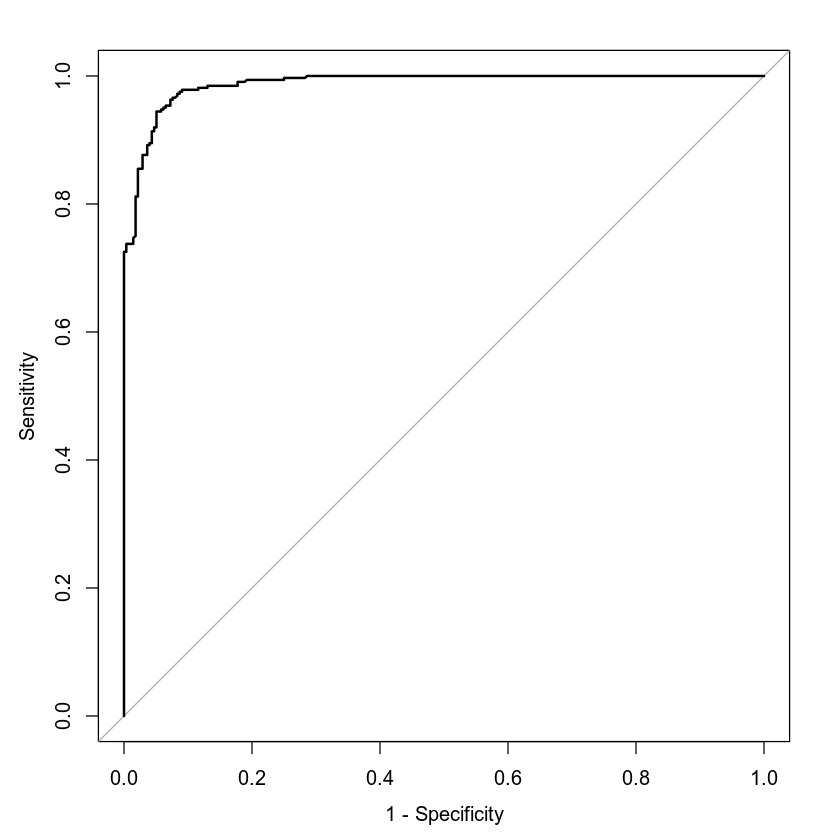

In [15]:
library(pROC)

labels <- credit_default$default
predictions <- logit$fitted.values

roc <- roc(labels ~ predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")
# True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity)
plot(roc, legacy.axes = TRUE)

In [21]:
# Prediction 1
print("Prediction: Credit utilization is 35%, owns only a car, and has missed payments in the last 3 months")
newdata1 <- data.frame(credit_utilize=0.35, assets="1", missed_payment="1")
pred1 <- predict(logit, newdata1, type='response')
round(pred1, 4)

# Prediction 2
print("Prediction: Credit utilization is 35%, owns a car and a house, and has not missed payments in the last 3 months")
newdata2 <- data.frame(credit_utilize=0.35, assets="3", missed_payment="0")
pred2 <- predict(logit, newdata2, type='response')
round(pred2, 4)

# Calculate odds from probabilities
odds1 <- pred1 / (1 - pred1)
odds2 <- pred2 / (1 - pred2)

# Print the odds
cat("Odds for Scenario 1:", odds1, "\n")
cat("Odds for Scenario 2:", odds2, "\n")





[1] "Prediction: Credit utilization is 35%, owns only a car, and has missed payments in the last 3 months"


1 
0.9529

[1] "Prediction: Credit utilization is 35%, owns a car and a house, and has not missed payments in the last 3 months"


1 
0.1986

Odds for Scenario 1: 20.22098 
Odds for Scenario 2: 0.2478421 


## End of Module Five Jupyter Notebook
Attach the HTML output along with your problem set report for the Module Five Problem Set. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in your problem set report. 